<a href="https://colab.research.google.com/github/fengfrankgthb/BUS-41204/blob/main/Problem%20Sets/(Unsupervised%2BDNN)PS2_widget_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# !pip is Package Install Python to install dataset library,
# process information is hidden into null device
# including "2"error / "1"output / "0"input
!pip install datasets > /dev/null 2>&1


In [36]:
# some interactive widgets output not savable in github
# load same common wine data included in ML
# prepare PCA principal component analysis
# StandardScaler to z-score normalize dataset mean=0 std=1
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Task: Unsupervised Learning**

For Unsupervised Learning Task, you'll follow these steps:

- 3.1 Explore and cluster the data.
- 3.2 Apply PCA to the data.
- 3.3 Wine recommendation.

## **3.1 Explore and cluster the data**
We load the wine dataset from Scikit-learn's built-in collection, including features and target labels.
This dataset contains information on different chemical properties of wines, which will be useful
for the clustering and and PCA analysis.

In [ ]:
df = load_wine(as_frame=True)
df = df.frame
df = df.drop(columns=["target"])
df.head()

**Exercise**: to add Code to show tail rows of data

In [ ]:
df.tail()

### Scale data:

Before proceeding with the analysis, we scale the data. This step standardizes the range of the
features, preventing variables with larger scales from dominating the results.

In [39]:
# define scalre as StandardScaler
scaler = StandardScaler()

features = scaler.fit(df) # learn and store the scaling parameters mean/std in features
features = features.transform(df) # scale data and uodate features

scaled_df = pd.DataFrame(features, columns=df.columns) # create scaled_df using features and original column
scaled_df.head() # print head rows of scaled_df

X = scaled_df.values # prepare X for trainging

**------self note------**

Above Code use "features" to first store the mean/std then keep the scaled data. Since fit() object keeps its result (mean/std), there is no need to use a variable "features" to duplicate them.

A clearer version of code would be:

    scaler = StandardScaler()
    scaler.fit(df)
    features_scaled = scaler.transform(df)

    scaled_df = pd.DataFrame(features_scaled, columns=df.columns)
    scaled_df.head()

**------end note------**

Next, we apply K-means clustering to the scaled data, determining the optimal number of clusters
using the elbow method. The elbow method helps identify the point where adding more clusters no
longer significantly improves the model’s performance, allowing us to choose the ideal number of
clusters for our analysis.

In [ ]:
wcss = {} # WCSS: Within Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), "gs-")
plt.xlabel("Values of 'k'")
plt.ylabel("WCSS")
plt.show()

**Question:** Based on the elbow method, how many clusters would you choose for the K-means clustering? Explain your reasoning. Use an LLM to figure out what WCSS stands for.

**Frank Answer** k=3 is the elbow. Between k=1 to 3, WCSS dropps steeply. Between K=3 and 10, WCSS dropps flattly. It means k=3 is the truning point of WCSS slope.

**WCSS** is the loss function of K-menas clustering. The lower the WCSS, the more accurate the clustering rules. The formular is:

$$WCSS = \sum_{i=1}^{K} \sum_{x_j \in C_i} ||x_j - \mu_i||^2$$

where $\mu_i$ is the center of i-th cluster $C_i$, and $x_j$ is the j-th data point


**Answer:** See above

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

**Exercise**

To scatterplot the data at K-means 3 clusters, use code below:

    # Get cluster labels and centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Extract the three important columns
    x_alcohol = X['alcohol']
    y_ash = X['ash']
    z_hue = X['hue']
    centroids_alcohol = centroids[:, X.columns.get_loc('alcohol')]
    centroids_ash = centroids[:, X.columns.get_loc('ash')]
    centroids_hue = centroids[:, X.columns.get_loc('hue')]

    # Create the 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot the data points, colored by their cluster label
    scatter = ax.scatter(x_alcohol, y_ash, z_hue, c=labels, cmap='viridis', marker='o', s=50)

    # Plot the centroids
    ax.scatter(centroids_alcohol, centroids_ash, centroids_hue, c='red', marker='X', s=200, label='Centroids')

    # Add labels and title
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Ash')
    ax.set_zlabel('Hue')
    ax.set_title('K-Means Clustering (K=3) in 3D')
    ax.legend()

    # Add a colorbar for the cluster labels
    cbar = fig.colorbar(scatter)
    cbar.set_label('Cluster')

    plt.show()

## **3.2 Apply PCA to the data**
Now, we apply Principal Component Analysis (PCA) to reduce the dimensionality of the data, extracting the first two principal components. This allows us to visualize the data in two dimensions while preserving most of the variance.

In [42]:
num_components = df.shape[1]
pca = PCA(n_components=num_components)
reduced_X = pd.DataFrame(
    data=pca.fit_transform(X), columns=[f"PC{i}" for i in range(1, num_components + 1)]
)
centers = pca.transform(kmeans.cluster_centers_)

In [ ]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, num_components + 1), explained_variance_ratio, marker="o", linestyle="--"
)
plt.title("Explained Variance Ratio by Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

**Question:** How many principal components should be selected to explain at least 80% of the variance in the dataset?

**Answer:** With 5 PCs, the explained variance ratio is 0.8, or 80%.

## Scatterplot with 2 PCs:

We now visualize the first two principal components, with the data points colored according to their cluster assignments. This visualization helps us understand how the clusters are distributed in the reduced two-dimensional space.

In [ ]:
plt.figure(figsize=(7, 5))

# Scatter plot
plt.scatter(reduced_X["PC1"], reduced_X["PC2"], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=100, c="red")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine Cluster")
plt.tight_layout()

## Compare with plots of other PCs:

See the scatterplot with PC1&3 below, in which less and fewer variances are captured by comparing to the plot with PC1&2.

In [ ]:
plt.figure(figsize=(7, 5))

# Scatter plot
plt.scatter(reduced_X["PC1"], reduced_X["PC3"], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=100, c="red")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.title("Wine Cluster")
plt.tight_layout()

Now, let's take a look at how each feature loads onto the first two principal components. This will show us which features have the biggest impact on the data’s variance in the reduced space.

In [ ]:
component_df = pd.DataFrame(
    (pca.components_[:2, :].T * np.sqrt(pca.explained_variance_[:2])).T,
    index=["PC1", "PC2"],
    columns=df.columns,
)
# Heat map
sns.heatmap(component_df)
plt.show()

**Exercise** Heatmap for first 5 PCs that explaining 80% variances:

In [ ]:
component_df = pd.DataFrame(
    (pca.components_[:5, :].T * np.sqrt(pca.explained_variance_[:5])).T,
    index=["PC1", "PC2", "PC3", "PC4", "PC5"],
    columns=df.columns,
)
# Heat map
sns.heatmap(component_df)
plt.show()

The following interactive scatter plot shows the first two principal components of the wine dataset, with data points color-coded by cluster assignment. You can select different features from the dropdown to visualize how each feature is distributed across these two principal components. This allows us to explore how the features relate to the two principal components.

**------self note------**

Widget's interactive results has to be cleared out before save to github.

**------end note------**

In [48]:
def plot_scatter(variable):
    plt.figure(figsize=(10, 7))

    # Scatter plot with cluster colors
    scatter = plt.scatter(
        reduced_X["PC1"],
        reduced_X["PC2"],
        c=kmeans.labels_,
        cmap="viridis",
        s=30,
        alpha=0.7,
    )

    # Plot cluster centers
    plt.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="x",
        s=150,
        c="red",
        label="Cluster Centers",
    )

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Wine Cluster with Annotated Labels")
    plt.legend()

    # Introduce small random noise to avoid overlap
    np.random.seed(42)  # For consistent results
    x_offsets = np.random.uniform(-0.2, 0.2, len(df))
    y_offsets = np.random.uniform(-0.2, 0.2, len(df))

    # Annotate points with the chosen variable
    for i, txt in enumerate(df[variable]):
        plt.annotate(
            txt,
            (reduced_X["PC1"][i] + x_offsets[i], reduced_X["PC2"][i] + y_offsets[i]),
            fontsize=8,
            ha="center",
            va="center",
        )

    plt.tight_layout()
    plt.show()


Code (widgets) below is deleted from code block above.

    '''
    ---entired block is deactivated for github saving---
    # Create a dropdown widget for selecting the variable

    dropdown = widgets.Dropdown(
        options=df.columns,
        value="alcohol",
        description="Variable:",
        disabled=False,
    )

    # Use interact to create an interactive plot
    widgets.interact(plot_scatter, variable=dropdown)
    ---end of block---
    '''

By default, the dropdown above is set to alcohol, which has a strong influence on the second principal component (PC2). You will notice that higher alcohol values tend to cluster at higher PC2 values. Similarly, malic acid plays a significant role in the first principal component (PC1). If you select malic_acid from the dropdown, you'll observe that large values of malic acid are primarily found at lower PC1 values. This reflects how the PCA transformation captures variations in the dataset, with PC1 and PC2 separating the features into distinct clusters.

### **3.3 Wine recommendation**
In this task, we’ll apply everything we’ve learned so far to find the perfect bottle of wine for a birthday party.
You're invited to a celebration and want to bring an excellent Swiss wine. You already know a wine your friend enjoys and hope to find a similar one—but not the exact same!
To identify comparable wines, we’ll use a dataset that focuses specifically on Swiss varieties, as the previous dataset included a broader selection. Let's begin by loading the new dataset.

In [ ]:
swiss_wine = pd.read_csv(
    "https://raw.githubusercontent.com/chansen776/MBA-ML-Course-Materials/refs/heads/main/Data/wines_data.csv"
)
swiss_wine.head()

**------self note------**

Use swiss_wine.tail() can find out there are only 17 wines in the dataset.

**------end note------**

Your friend enjoys wine from the Schwarzenbach winery, and you'd like to find similar options. To do this, we'll first cluster the data to group similar wines. Then, for better visualization, we'll reduce the dimensionality to two so we can represent the results graphically.

In [ ]:
# Clustering
swiss_wine_numeric = swiss_wine[["Alkohol", "Gesamtsäure", "Restzucker", "Jahrgang"]]
swiss_wine_numeric = scaler.fit_transform(swiss_wine_numeric)
kmeans = KMeans(n_clusters=3)
kmeans.fit(swiss_wine_numeric)

In [51]:
# Dimensionality Reduction
pca = PCA(n_components=2)
scaler = StandardScaler()
swiss_wine_numeric = scaler.fit_transform(swiss_wine_numeric)
reduced_swiss_wine = pca.fit_transform(swiss_wine_numeric)

Now, we're ready to identify similar wines. To visualize the results, we'll plot the first two principal components and annotate each point with its corresponding cluster label. This will help us see how the wines are grouped and identify those most similar to the ones from Schwarzenbach.

In [ ]:
centers = pca.transform(kmeans.cluster_centers_)
for cluster_id in range(kmeans.n_clusters):
    plt.scatter(
        reduced_swiss_wine[kmeans.labels_ == cluster_id, 0],  # PC1
        reduced_swiss_wine[kmeans.labels_ == cluster_id, 1],  # PC2
        label=f"Cluster {cluster_id + 1}",  # Assign proper cluster labels
        alpha=0.7,
    )

plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="x",
    s=100,
    c="red",
)

point_index = 0
x_point, y_point = reduced_swiss_wine[point_index]
print(swiss_wine.iloc[point_index])

plt.text(
    x_point,
    y_point + 0.1,
    "Schwarzenbach",
    fontsize=12,
    ha="center",
    color="black",
)


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Swiss Wine Cluster")
plt.legend()
plt.tight_layout()
plt.show()

**Question:** Wines from which clusters would you recommend? Pick one cluster (1/2/3) and see which wines you should
bring to your friend's party.


**Answer:** cluster-1 contains the **Schwarzenbach** that we know the firend likes.

In [ ]:
# Pick you cluster
cluster_id = 1
swiss_wine[kmeans.labels_ == cluster_id - 1]

# **Task:** **Transfer Learning** with PACS (Photo-Art-Cartoon-Sketch) Dataset

## Setup
Import necessary libraries and define basic settings like training/testing domains, batch size, number of epochs, and device.

In [3]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from datasets import load_dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import ResNet18_Weights, resnet18

# Settings
train_domain = "photo"
test_domains = ["art_painting", "cartoon", "sketch"]
batch_size = 32
num_epochs = 5 # One would typically train using way more epochs. We use 5 for a quick demo.
device = torch.device("cpu")  # No GPU

# Set the random seed for reproducibility
seed = 42
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Problem Statement: Domain Shift

In real-world applications, visual recognition systems often encounter data that differs in style or appearance from what they were trained on — a challenge known as **domain shift**. To build robust models that generalize well across different visual styles, we turn to **domain generalization** benchmarks.

Our objective is to **train a model that can classify objects accurately across domains**, using only the image itself as input. Specifically, we want to assess whether a model trained on images from one visual domain (e.g., natural photographs) can generalize to a significantly different domain (e.g., hand-drawn sketches), without seeing examples from the target domain during training.

**------self note------**

Examples of Domain Shift: **Domains** can be specific in device, technology, time, location/geography, and demography.

**1. Changes in Image Acquisition**:
* Synthetic to Real Images
* Different Cameras/Sensors
* Medical Imaging

**2. Variations in Environmental Conditions**:
* Weather Conditions
* Lighting Conditions
* Time of Day

**3. Differences in Content and Style**:
* Artistic Styles
* Image Background
* Object Pose and Viewpoint:

**4. Dataset Bias**:
* Geographic Bias
* Demographic Bias (face recog)
* Class Imbalance

**5. Digital Pathology**:
* Different medical centers or different times can have variations in color, brightness, and contrast due to staining variations and scanner properties. Even different tissue or staining types can introduce domain shift.

---

# Dataset: PACS

To evaluate this, we use the **PACS dataset** — a popular benchmark for domain generalization and adaptation research. The dataset features four distinct visual domains:

- **Art Painting** – artistic renditions in diverse painting styles  
- **Cartoon** – simplified and stylized illustrations  
- **Photo** – real-world, natural images (similar to ImageNet)  
- **Sketch** – black-and-white hand-drawn sketches

Each domain contains images from the **same 7 object categories**:

`['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person']`

This consistent label set allows for direct cross-domain evaluation.

**------self note------**

there are 9991 rows (9991 images) in PACS, total files size 119MB.

**------end note------**

---

# Experimental Setup

We adopt a simplified domain generalization setup, we only train on one domain and test on all other domains.

- **Train** on: `'photo'` domain (real-world images)  
- **Test** on: `'art_painting'`, `'cartoon'`, `'sketch'` domains

This tests the model’s ability to generalize from natural photos to a starkly different visual style
without access to the data of the domains during training.

---

# Load the PACS Dataset

Download the PACS dataset using **Hugging Face** `datasets`, and filter by the selected training and testing domains.

**------About Hugging Face------**

The **Hugging Face** Datasets library is a powerful and user-friendly tool for accessing, sharing, and efficiently processing datasets for ML tasks, particularly in NLP, Computer Vision, and Audio. It's a core component of the Hugging Face ecosystem, tightly integrated with the Hugging Face Hub and the Transformers library. Here's a breakdown of what makes up the Hugging Face Datasets:

**1. A Vast Hub of Ready-to-Use Datasets**:

Over 250,000 publicly available datasets are hosted on the Hugging Face Hub, covering a wide range of tasks, including:
* NLP: Text classification, question answering, machine translation, summarization, text generation, and more. Examples are SQuAD, IMDB, Common Crawl, and many multilingual datasets.
* Computer Vision: Image classification, object detection, image segmentation, etc. Examples include CIFAR-10, ImageNet, and COCO.
* Computer Audio: Speech recognition, audio classification, etc. Examples include LibriSpeech and Common Voice.
* Multimodal: Datasets combining different modalities like text and images.
* Tabular: Datasets in formats like CSV and JSON for various machine learning tasks.
You can easily discover and load these datasets with a single line of Python code using the **load_dataset()** function.

**2. Efficient Data Handling and Processing**:

* Memory Efficiency: The library is designed to handle large datasets efficiently. It often uses memory mapping and streaming techniques, allowing you to work with datasets that are larger than your RAM without loading the entire dataset into memory at once.
* Fast Data Access: It leverages the Apache Arrow format as its underlying data structure, enabling zero-copy reads and efficient data manipulation.
* Easy Data Preprocessing: The library provides convenient methods for common data preprocessing steps, such as:
  * Tokenization: Integrating seamlessly with Hugging Face Tokenizers.
  * Splitting: Dividing datasets into training, validation, and test sets.
  * Shuffling: Randomizing the order of data samples.
  * Filtering: Selecting specific subsets of the data based on criteria.
  * Mapping: Applying functions to each element of the dataset for transformations.
  * Batching: Grouping data samples into batches for training.

**3. Integration with Popular Frameworks**: Hugging Face Datasets has built-in interoperability with popular machine learning frameworks like PyTorch, TensorFlow, NumPy, Pandas, and JAX. You can easily convert datasets into formats suitable for these frameworks.

**4. Tools for Creating and Sharing Your Own Datasets**: The library allows you * to load datasets from various local file formats (e.g., CSV, JSON, text files, image folders, audio files).
* It provides tools and guidelines for creating your own dataset loading scripts and sharing your datasets on the Hugging Face Hub with the community. This fosters collaboration and makes valuable data accessible to others.

**5. Dataset Information and Metadata**:

* Each dataset on the Hub comes with a dataset card that provides important information like a description, supported tasks, languages, size, and licensing.
The library allows you to access metadata about the dataset, such as feature names and data types.

**In essence, the Hugging Face Datasets library acts as a central hub and a powerful toolkit for working with machine learning datasets. It simplifies the process of finding, loading, preprocessing, and sharing data, making it an invaluable resource for researchers and practitioners in the field.**

For example, to load the *imdb* dataset, use code:

    pip install datasets
    from datasets import load_dataset

    # Load the 'imdb' dataset
    imdb_dataset = load_dataset("imdb")



In [ ]:
# Load PACS dataset from Hugging Face
dataset = load_dataset("flwrlabs/pacs")

# Get class info
label_info = dataset["train"].features["label"]
num_classes = len(label_info.names)

# Filter by domain
train_dataset = dataset["train"].filter(lambda x: x["domain"] == train_domain)
test_dataset = dataset["train"].filter(lambda x: x["domain"] in test_domains)

**Exerciuse**

Add code below to show the 50th images in tain-dataset and test_dataset.

In [ ]:
example = train_dataset[49]
image = example['image']

# Display the image using matplotlib
plt.imshow(image)
plt.show()

example = test_dataset[49]
image = example['image']

# Display the image using matplotlib
plt.imshow(image)
plt.show()

# Define and Apply Image Transforms
Set up separate transform pipelines for training and testing (resizing, normalization, augmentation,
etc.). Use `.with_transform()` to apply preprocessing transforms to each domain dataset.

In [23]:
# Image transforms
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Apply transforms
def apply_transform(batch, transform):
    batch["image"] = [transform(img) for img in batch["image"]]
    return batch

train_dataset = train_dataset.with_transform(lambda batch: apply_transform(batch, transform_train))
test_dataset = test_dataset.with_transform(lambda batch: apply_transform(batch, transform_test))

Code to compare the transformed images with originals. Note the **incorrect Image Format** for plt.imshow():

* **The transforms.ToTensor()** converts the PIL Image object (typical format of images in Hugging Face datasets) into a PyTorch tensor. **matplotlib.pyplot.imshow()** expects a NumPy array-like image in the format (height, width, channels) for RGB images or (height, width) for grayscale. A PyTorch tensor has a channel-first format (channels, height, width).

  * **Solution**: To permute the dimensions of the tensor and convert it to a NumPy array by **image_tensor.permute(1, 2, 0).numpy()**

The 50th image train_dataset is fliped by *transforms.RandomHorizontalFlip()*, whereas the one in test_dataset remained as is.

In [ ]:
example = train_dataset[49]
image_tensor = example['image']
image_np = image_tensor.permute(1, 2, 0).numpy()  # Change (C, H, W) to (H, W, C)
plt.imshow(image_np)
plt.title("50th Image (Transformed - Train)")
plt.axis('off')
plt.show()

example = test_dataset[49]
image_tensor = example['image']
image_np = image_tensor.permute(1, 2, 0).numpy()  # Change (C, H, W) to (H, W, C)
plt.imshow(image_np)
plt.title("50th Image (Transformed - Test)")
plt.axis('off')
plt.show()

# Visual Inspection
Let's have a look at typical images of the training and test domain.

In [ ]:
def show_example(dataset, label_names, title):
    example = dataset[1]  # safer to use 0 than 1 in case dataset is small
    img = example["image"]
    label = example["label"]
    plt.imshow(img.permute(1, 2, 0))
    plt.title(f"{title} - Class: {label_names[label]}")
    plt.axis("off")
    plt.show()


# Show example from training domain
show_example(train_dataset, label_info.names, f"Train Domain: {train_domain}")

# Show example(s) from test domain(s)
for domain in test_domains:
    for example in test_dataset:
        if example["domain"] == domain:
            img = example["image"]
            label = example["label"]
            plt.imshow(img.permute(1, 2, 0))
            plt.title(f"Test Domain: {domain} - Class: {label_info.names[label]}")
            plt.axis("off")
            plt.show()
            break

# DataLoader Sanity Check
Create PyTorch DataLoaders and inspect a batch to verify image shapes and labels.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Sanity check
batch = next(iter(train_loader))
print(type(batch["image"]))
print(batch["image"].shape)
print(batch["label"])

**------self note------**

Explain the results above:

**torch.Size([32, 3, 224, 224])** is the batch shape. There are **32** images in this batch, each image has **3** color channels, with H x W as **224 x 224**.

**tensor([*2*, 6, *1*, 5, 6, 5, 1, 2, *0*, 3, 6, 5, 4, 6, 6, 4, 0, 1, 2, 5, 6, 0, 6, 3,3, 5, 0, 6, 2, 6, 5, 5])** is the batch tensor for labels in the batch. It indicates the first image in batch is **2:photo**, third image is a **1:cartoon**, and the 9th image is a **0:art_painting**.

**------end note------**

# Model Setup: ResNet-18

For image classification tasks, convolutional neural networks (CNNs) are commonly used due to their ability to extract spatial features from images. In this notebook, we use a **pretrained ResNet-18** model, a lightweight yet effective architecture.

We replace the final fully connected layer to match the number of classes in our dataset. To reduce computational load, we **freeze the backbone** of the network and fine-tune only the classifier head. This approach allows us to adapt the model to our specific task without retraining the entire network, which is especially useful when working on CPUs or with limited resources.

**------self note------**

Typically, we have these arguements when calling resnet18() as defaults:

* **Pre-trained = False**: The model's weights are initialized randomly. It does not load weights that have been pre-trained on a large dataset like ImageNet.
* **num_classes = 1000**: The final fully connected layer is configured to output predictions for 1000 classes, which is the number of classes in the ImageNet dataset.
* **Other architecture-specific parameters**: These are usually internal to the ResNet-18 definition and you don't typically need to change them for standard use. They define the number of layers, filter sizes, strides, etc.e.
  * **block = torchvision.models.resnet.BasicBlock**: the type of residual block to use. For ResNet-18, the default is torchvision.models.resnet.BasicBlock.
  * **layers = [2, 2, 2, 2]**: a list that specifies the number of residual blocks in each of the four "stages" of the ResNet. For ResNet-18, the default is [2, 2, 2, 2], meaning two BasicBlocks in each of the four residual stages. This is what defines the "18" in ResNet-18 (counting the initial conv layer, pooling, the 4 stages with 2 blocks each (2x4=8 conv layers), the final avgpool, and the FC layer: 1 + 1 + 8x2 + 1 = 18 layers with weights)
  * **zero_init_residual = false**: a boolean that determines whether to initialize the weights of the last Batch Normalization layer in each residual block to zero. This was a technique proposed in the original ResNet paper to help with training very deep networks initially.
  * **groups = 1**: This parameter relates to Grouped Convolutions. For standard ResNet-18, the default is 1, meaning standard convolutions are used. You might see this parameter used in more advanced architectures like ResNeXt.
  * **width_per_group = 64**: This parameter also relates to grouped convolutions and controls the number of channels within each group.
  * **replace_stride_with_dilation = None**: a boolean that can be used to replace the stride of the first convolution in certain residual blocks with a dilation. This is often used in tasks like semantic segmentation to maintain a larger feature map size.
  * **norm_layer = torch.nn.BatchNorm2d**: This parameter allows to specify the type of normalization layer to use (e.g., torch.nn.BatchNorm2d, torch.nn.InstanceNorm2d). The default is Batch Normalization.


In [28]:
# Model setup (ResNet18)
model = resnet18(weights=ResNet18_Weights.DEFAULT)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Freeze backbone
for param in model.parameters():
    param.requires_grad = False

# Unfreeze only classifier
for param in model.fc.parameters():
    param.requires_grad = True

model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]


# State-of-the-Art CNNs

Recent advancements in convolutional neural networks and hybrid architectures have led to highly accurate, large-scale models. These state-of-the-art architectures are commonly used in cutting-edge applications and typically require significant compute resources such as multi-GPU or TPU setups.

Below is a list of modern architectures, along with **ResNet-18** for comparison, which remains a popular baseline due to its simplicity and efficiency.

| Model                  | Parameters | ImageNet Top-1 Accuracy | Highlights |
|------------------------|------------|--------------------------|------------|
| **CoAtNet-7**          | ~2.44B     | ~90.88%                  | Hybrid model combining convolution and attention; excels on large-scale tasks |
| **ViT-G/14**           | ~1.84B     | ~90.45%                  | Giant Vision Transformer achieving top-tier performance on ImageNet |
| **EfficientNetV2-L**   | ~120M      | ~85.7%                   | Efficient architecture found via neural architecture search (NAS) |
| **RegNetY-32GF**       | ~145M      | ~82.9%                   | Balances performance and efficiency; part of the RegNet design space |
| **ResNet-18**          | ~11.7M     | ~69.8%                   | Lightweight CNN; widely used in resource-constrained and rapid prototyping settings |



---

# Why Use ResNet-18?

**ResNet-18** is a much smaller network with only **~11.7 million parameters**. While it is no longer considered state-of-the-art in terms of accuracy, it remains a strong baseline due to its:

- Fast training on CPU or resource-limited environments
- Solid generalization capabilities
- Simplicity and interpretability

In this notebook, we use ResNet-18 due to **computational constraints** and the need for efficient training during domain adaptation tasks.

In [29]:
# Initialize lists to track training performance
train_losses = []
train_accuracies = []

# Training Loop

Train the model on the training domain for the specified number of epochs, tracking training loss and accuracy throughout.  
**Note:** Training takes approximately 30 minutes. You don't necessarily need to run the code, as the results are already computed (see below).

**------self note------**

**criterion = nn.CrossEntropyLoss()** defines the loss function here. This is the standard and generally the correct choice for multi-class classification tasks in PyTorch.

**What Cross-Entropy Loss Does?** Cross-entropy loss measures the dissimilarity between the predicted probability distribution of the model and the true distribution of the labels. In a multi-class classification scenario:

  * Model Output: Your ResNet-18 model (after the final fully connected layer and typically before a softmax in the loss calculation - as CrossEntropyLoss handles this internally) will output a tensor of raw, unnormalized scores (often called logits) for each class for each image in the batch.

  * True Labels: Your target labels for each image in the batch will be integer values representing the correct class index (e.g., 0, 1, 2, ... up to num_classes - 1).

  * Internal Softmax: nn.CrossEntropyLoss() internally applies the softmax function to the model's raw output logits. The softmax function converts these raw scores into a probability distribution over the classes, where each probability is between 0 and 1, and the sum of probabilities for all classes for a given image is 1. The softmax function for a vector of logits z=[z_1, z_2,...,z_C], (where C is the number of classes) is calculated as:

$$P(y=i|z)=\frac{e^{z_i}}{\sum_{j=1}^{C}e^{z_j}}$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where $P(y=i∣z)$ is the predicted probability that the image belongs to class i.

  * Negative Log-Likelihood (NLL): After the softmax, the CrossEntropyLoss calculates the negative log-likelihood (NLL) of the true class. For a single training example, if the true class is c, and the predicted probability for class c from the softmax output is $p_c$, the NLL is $-log(p_c)$.

  * Averaging: Finally, the loss is averaged over all the training examples in the current batch.

**Why CrossEntropy Suits for Multi-Class Classification?**

* Probability Distribution: It encourages the model to output a probability distribution that aligns with the true class. The model is penalized more when it assigns a low probability to the correct class.
* Handles Mutually Exclusive Classes: It's designed for scenarios where each image belongs to exactly one class (which is typical for image classification).
* Combines Softmax and NLL: By performing the softmax internally, it simplifies the training pipeline. You don't need to explicitly add a separate softmax layer before calculating the loss.
* Gradient Flow: It provides useful gradients for backpropagation, allowing the model to learn effectively.

Note: It took me 19min and 14min to run this module of training first and second time, both much faster than I did on the X-ray dataset in also 5 epoch.


**------end note------**

In [30]:
# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch in train_loader:
        inputs = batch["image"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total * 100
    train_losses.append(running_loss)
    train_accuracies.append(acc)
    print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {running_loss:.4f} - Train Acc: {acc:.2f}%")


Epoch 1/5 - Loss: 72.2053 - Train Acc: 60.48%
Epoch 2/5 - Loss: 33.8577 - Train Acc: 91.32%
Epoch 3/5 - Loss: 21.5283 - Train Acc: 94.61%
Epoch 4/5 - Loss: 15.8796 - Train Acc: 96.71%
Epoch 5/5 - Loss: 12.8021 - Train Acc: 96.53%


# Training Performance Visualization
Plot training loss and accuracy across epochs.

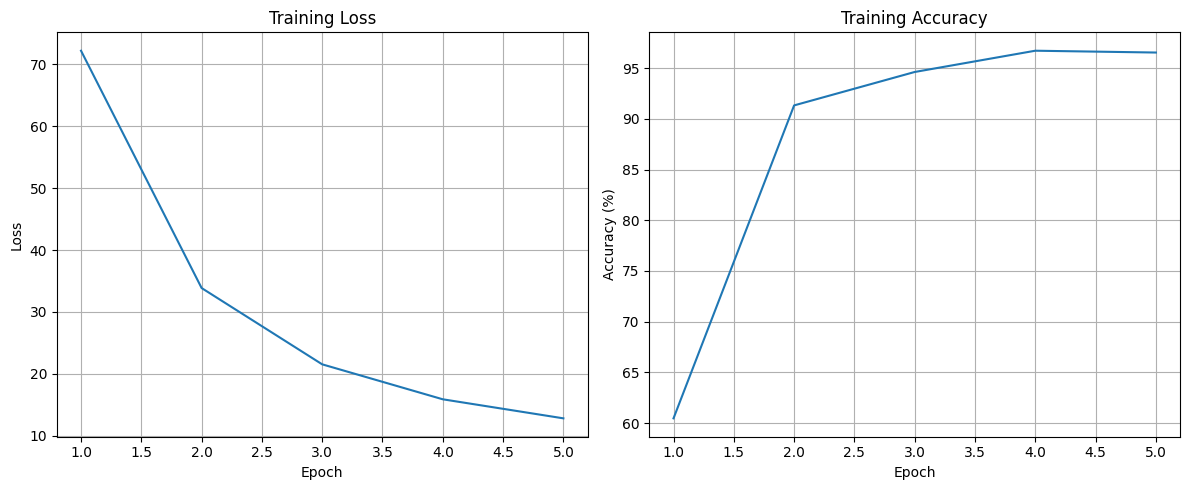

In [31]:
epochs = list(range(1, len(train_losses) + 1))
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


# Evaluation
Evaluate the model on the test domains and compute final accuracy.

# Test Accuracy Across Domains
Visualize how well the model performs on the target domains after training.

In [32]:

domain_accuracies = {}

model.eval()
with torch.no_grad():
    for domain in test_domains:
        domain_subset = dataset["train"].filter(
            lambda x: x["domain"] == domain, load_from_cache_file=False
        )

        domain_subset = domain_subset.with_transform(
            lambda batch: apply_transform(batch, transform_test)
        )
        domain_loader = DataLoader(domain_subset, batch_size=64)

        correct = 0
        total = 0

        for batch in domain_loader:
            inputs = batch["image"].to(device)
            labels = batch["label"].to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        acc = correct / total * 100
        domain_accuracies[domain] = acc
        print(f"Accuracy on '{domain}': {acc:.2f}%")

Filter:   0%|          | 0/9991 [00:00<?, ? examples/s]

Accuracy on 'art_painting': 56.79%


Filter:   0%|          | 0/9991 [00:00<?, ? examples/s]

Accuracy on 'cartoon': 21.76%


Filter:   0%|          | 0/9991 [00:00<?, ? examples/s]

Accuracy on 'sketch': 17.18%


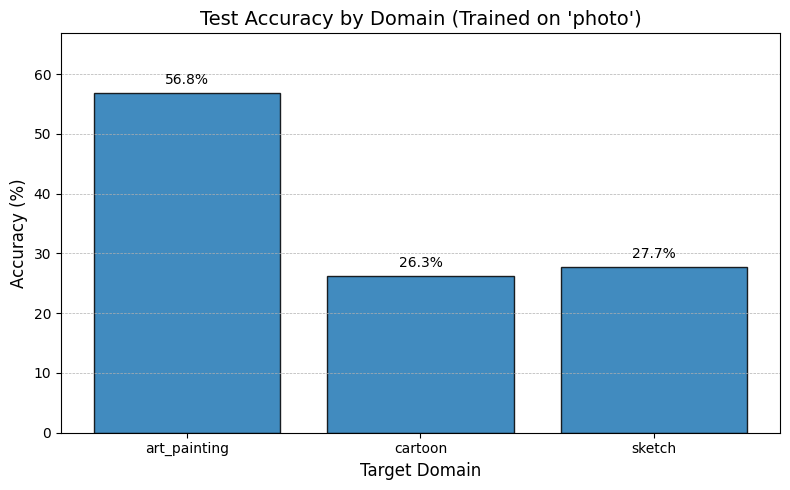

In [ ]:
domains = list(domain_accuracies.keys())
accuracies = list(domain_accuracies.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(domains, accuracies, edgecolor="black", alpha=0.85)

# Add accuracy labels on top of each bar
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        yval + 1,
        f"{acc:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.xlabel("Target Domain", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title(f"Test Accuracy by Domain (Trained on '{train_domain}')", fontsize=14)
plt.ylim(0, max(accuracies) + 10)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


The model achieves a test accuracy of **56.8%** on the `'art_painting'` domain, 26.3% on the
`'cartoon'` domain and 27.7% on the `'sketch'` domain, compared to **97.72%** on the training domain
`'photo'`. While this is significantly
better than random guessing (which would yield about **14.3%** accuracy with 7 classes) for all test
domains, it clearly illustrates the challenge of **domain shift**.

The model was trained exclusively on `'photo'` images, and struggles to generalize to the visually
distinct test domains. This performance gap is a common issue in domain adaptation and
underscores the importance of training on **diverse and representative domains** to improve
generalization to unseen styles.

Here are some approaches to improve the performance on the test domain:

- **Train on multiple source domains**  
  Including additional domains (e.g., `'sketch'`, `'cartoon'`) during training can help the model learn more robust, domain-invariant features.

- **Use stronger data augmentation**  
  Techniques such as color jittering, random cropping, rotation, or even style transfer can simulate domain variability during training.

- **Fine-tune more layers**  
  Instead of freezing the entire backbone, selectively unfreezing the last few blocks (e.g., `layer4`) can help the model adapt better to the target domain.

- **Use a more expressive model**  
  Switching to a deeper architecture like ResNet-50 or EfficientNet (if compute allows) may improve generalization.

- **Domain adaptation techniques**  
  Explore advanced strategies like **Domain-Adversarial Training (DANN)**, **Maximum Mean Discrepancy (MMD)**, or **CORAL** to align feature distributions between source and target domains.

- **Self-training on target domain**  
  If unlabeled target data is available, semi-supervised learning (e.g. **pseudo-labeling**) can help bridge the domain gap.

# Question
What factors might explain the significant variation in test accuracy across different domains?
The model achieves 56.8% accuracy on the `'art_painting'` domain, 26.3% on `'cartoon'`, and 27.7% on
`'sketch'`, compared to 97.72% on the training domain `'photo'`.

Why do you think the model generalizes better to `'art_painting'` than to `''cartoon'` or `'sketch'`? What characteristics of these domains might make them more or less challenging for the model?

**Frank Answer**

Domain shift is the major problem from training to test.

* **Art_painting**: are either in realism (e;g., impressionism, fauvism, surrealism) style or stressing on realism components. It is reasonable that a lot art paintings bear similar components with photos the training data

* **Cartoon** exageration ertain components from the image to stress an non-realistic impression. This is the major sources of domain variance that pre-trained ResNet18 is not optimized.

* **Sketch** bears some skeleton components of images, but loses a lot more detail specifics on which a pretrained computer model mostly rely to predict. Compare to cartoons that contains both skeleton and some detail specifics, it is reasonable to see that model performance on Sktech is worse.

**Solution**: Like the search rankings that weigh abstract and titles more than textbody, we can incorporate the model that weighs more on skeleton/profile information than finer details. That is to identify the neurons what coincide with skeleton/profile information and boost weights on them during training.

# Short-Answer Case Question:

Consider applying Reinforcement Learning (RL) to optimize dynamic pricing strategies in e-commerce. Reflect on the following practical considerations:

* **Measuring Success**: How would you define success in a real-world pricing system? Think about key metrics such as conversion rates, revenue, or customer satisfaction.

*  **Training the Model**: How much time would you allocate for model training? Would you prefer to train the model over a fixed period, or allow it to continuously learn from real-time data? What are the advantages and trade-offs of each approach?

* **Tracking States**: What states are important for dynamic pricing (e.g., market conditions, customer behavior, competitor prices)? How would you make sure these states are measurable and useful in making pricing decisions?

*  **Action Space Constraints**: What constraints would you place on the pricing model (e.g., price ranges or rate limits) to ensure practical, realistic outcomes? How would these constraints be enforced within the RL model?

*  **Simulation In Practice**: How realistic do you think the simulation model for dynamic pricing is? Would you trust its predictions in a real-world setting? How would you test or validate the simulation using actual e-commerce data?